# Plotting Dark Count Rate vs. Photoelectron
## Problem description
The charge carrier that triggers the electron avalanche in a Multi-Pixel Photon Counter (MPPC) can be generated from the absorption of a photon or other sourses such as thermal activation. If one raises the trigger threshold gradually and monitor the trigger rate in dark, it is easily understood that the trigger rate maintains roughly the same until the threshold passes the amplitude of the siganl of a certain photoelectron, when a sudden drop in trigger rate occurs. Here is a reference plot from Hamamatsu.

![title](https://hub.hamamatsu.com/sp/hc/resources/TN0014/figure_4-14.jpg)

This is the target plot of this discussion.
## What is measured
Lets first take a look at what is measured by the data taking system.

To prepare to use the written dark rate class, the peak numbering algorithm has to be run through. Some intermediate plots are generated followed by the last plot with the correct peak numbers.

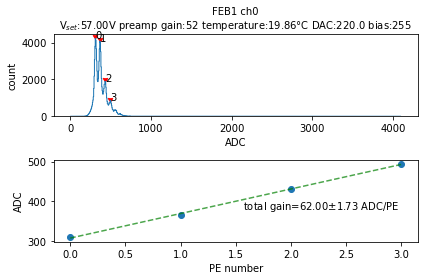

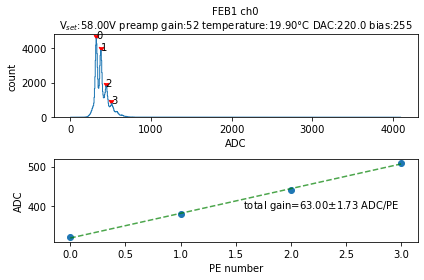

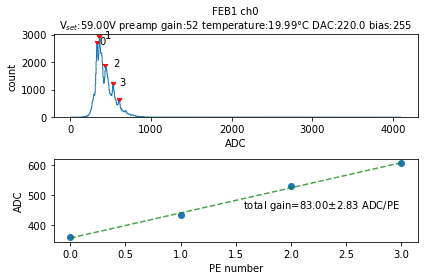

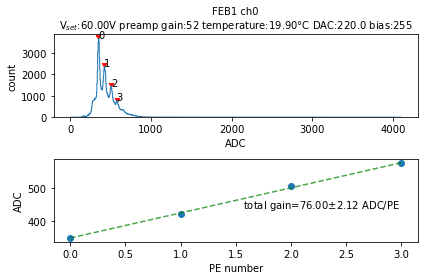

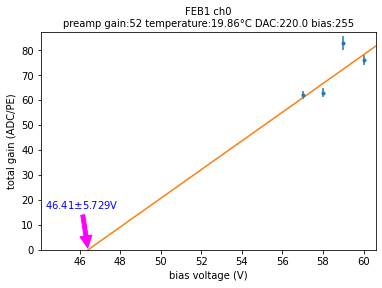

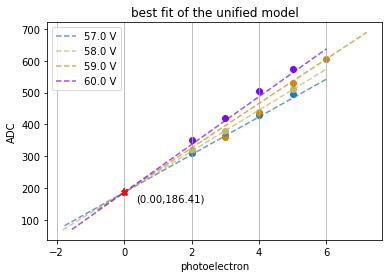

In [1]:
# my own modules
import os, sys
sys.path.insert(0, '../FEBDAQMULTx2/data_analysis/utilities')
import peak_numbering
import software_threshold_scan

# get correct peak number with the peak numbering algorithm
calib_fpns = [
    'sample_data/dark_rate_vs_photoelectron/led/20210316_135808_dark_rate_feb0_ch0_thr220.0.root',
    'sample_data/dark_rate_vs_photoelectron/led/20210316_165442_dark_rate_feb0_ch0_thr220.0.root',
    'sample_data/dark_rate_vs_photoelectron/led/20210316_184751_dark_rate_feb0_ch0_thr220.0.root',
    'sample_data/dark_rate_vs_photoelectron/led/20210317_123358_dark_rate_feb0_ch0_thr220.0.root'
]
pcb_half = 0
my_pn = peak_numbering.fitting_algorithm(calib_fpns, 1, 0, prom=100, pcb_half=pcb_half)
my_pn.fit_peak_numbering(shift_limit=4)
my_pn.refit_physics_parameters()
my_pn.plot_adc_vs_peak_number()

Now, we can construct the noise rate class.

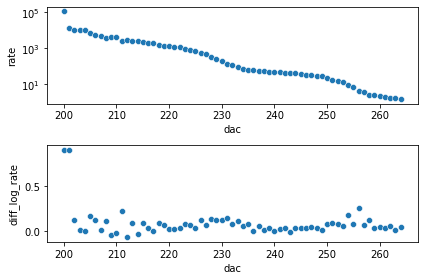

In [2]:
dark_rate_fpns = 'sample_data/dark_rate_vs_photoelectron/dark/*.root'
my_scan = software_threshold_scan.peak_number_dataframe(dark_rate_fpns, my_pn.df_3d_pts,
                                                        calib_thr=220, pcb_half=pcb_half, outpn=None)
my_scan.plot_rate_and_diff_rate_vs_dac(filtered=False)